In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

In [2]:
hob = pickle.load(open('hoboken/hoboken.p','rb'))
us = pickle.load(open('covid-19-data/us.p','rb'))
nj = pickle.load(open('covid-19-data/nj.p','rb'))
nyc = pickle.load(open('covid-19-data/nyc.p','rb'))

In [3]:
nyc.tail()

,date,county,state,fips,cases,deaths,cases_1,cases_delta,cases_7,cases_100k
1302143,2021-05-09,New York City,New York,NaN,937338,32836.0,936360.0,978.0,1029.428571,12.227445
1305389,2021-05-10,New York City,New York,NaN,938087,32864.0,937338.0,749.0,971.285714,11.536830
1308635,2021-05-11,New York City,New York,NaN,938577,32887.0,938087.0,490.0,913.714286,10.853003
1311882,2021-05-12,New York City,New York,NaN,939478,32934.0,938577.0,901.0,897.285714,10.657866
1315128,2021-05-13,New York City,New York,NaN,940321,32966.0,939478.0,843.0,862.142857,10.240443


In [4]:
hob = hob[['date','cases_100k']]
us = us[['date','cases_100k']]
nj = nj[['date','cases_100k']]
nyc = nyc[['date','cases_100k']]

In [5]:
us['date'] = pd.to_datetime(us['date'])
nj['date'] = pd.to_datetime(nj['date'])
nyc['date'] = pd.to_datetime(nyc['date'])

In [6]:
# combine
df = us.merge(nyc, how='left', on='date', suffixes=('_us','_nyc'))\
    .merge(nj, how='left', on='date', suffixes=('_us','_nj'))\
    .merge(hob, how='left', on='date', suffixes=('_nj','_hob'))

df.tail(20)

,date,cases_100k_us,cases_100k_nyc,cases_100k_nj,cases_100k_hob
459,2021-04-24,18.134364,27.804456,32.960723,27.142857
460,2021-04-25,17.790157,26.614970,30.620517,22.571429
461,2021-04-26,16.787239,23.866085,12.625856,23.428571
462,2021-04-27,16.406272,22.710536,11.475858,22.000000
463,2021-04-28,16.058319,21.415845,9.282015,19.428571
464,2021-04-29,15.693249,19.574771,7.696143,18.571429
465,2021-04-30,15.455270,18.692413,6.124747,15.714286
466,2021-05-01,15.198650,18.400557,4.204330,12.857143
467,2021-05-02,15.024913,17.389239,3.406569,12.857143
468,2021-05-03,15.134669,17.107563,19.471162,11.142857


In [7]:
df.columns=['date','US','NYC','NJ','Hoboken']

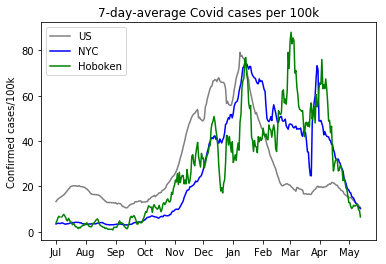

In [8]:
cutoff = datetime.strptime('Jul 1 2020', '%b %d %Y')
df_plot = df[df['date']>=cutoff]

fig, ax = plt.subplots()
ax.plot(df_plot.date, df_plot.US, 'grey')
ax.plot(df_plot.date, df_plot.NYC, 'blue')
ax.plot(df_plot.date, df_plot.Hoboken, 'green')

ax.legend()
ax.set_ylabel('Confirmed cases/100k')
ax.set_title('7-day-average Covid cases per 100k')
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

# there's a restatement in the NYC data (late March) but I don't feel like cleaning it